In [140]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [141]:
infol = 'cell_files'
infiles = os.listdir(infol)

if '.ipynb_checkpoints' in infiles:
    infiles.remove('.ipynb_checkpoints')
    
if '.DS_store' in infiles:
    infiles.remove('.DS_store')

num_groups = 5

cell = 'mNeu'
cell_real = 'mNeu_real'

In [142]:
def generate_lists(df, cell_name, cell_name_real):
    num = 0
    avg_vals_real = []
    avg_vals = []
    avg_lst_real = np.zeros(num_groups)
    avg_lst = np.zeros(num_groups)

    mNeu_arr = np.array(df[cell_name])
    mNeu_arr_real = np.array(df[cell_name_real])
    for i in range(len(df)):
        if num == num_groups:
            avg_vals.append(np.mean(avg_lst))
            avg_vals_real.append(np.mean(avg_lst_real))
            avg_lst_real = np.zeros(num_groups)
            avg_lst = np.zeros(num_groups)
            num = 0
        avg_lst[num] = mNeu_arr[i]
        avg_lst_real[num] = mNeu_arr_real[i]
        num += 1
    
    avg_vals.append(np.mean(avg_lst))
    avg_vals_real.append(np.mean(avg_lst_real))

    return avg_vals, avg_vals_real

[0.0, 0.0, 0.0024634852, 0.009852484199999999, 0.0197063766, 0.045573353, 0.0997807326, 0.21435699280000003, 0.4595339256, 0.9939795121999999] [0.5219558683673148, 0.46618823830351597, 0.4778613176832257, 0.6160613180623603, 0.565323837609088, 0.46206761187654555, 0.5174708292328993, 0.6161534045428342, 1.25355149276044, 1.729869424296652]
[0.0, 0.0, 0.0024634852, 0.009852484199999999, 0.0197063766, 0.045573353, 0.0997807326, 0.21435699280000003, 0.4595339256, 0.9939795121999999] [4.115150079165483, 4.05539897066477, 3.96858471367024, 4.206666294042423, 4.062108709393217, 3.6749949036620464, 4.493649324187734, 4.4092131111581505, 4.295328700591858, 4.37748877974437]
[0.0, 0.0, 0.0024634852, 0.009852484199999999, 0.0197063766, 0.045573353, 0.0997807326, 0.21435699280000003, 0.4595339256, 0.9939795121999999] [0.7361962165653645, 0.6198366598219736, 0.7648994874062294, 0.8593776900670678, 0.7026173295855789, 0.7064934250717166, 0.6388302438366966, 0.8871874226576338, 1.1559075463182988, 1

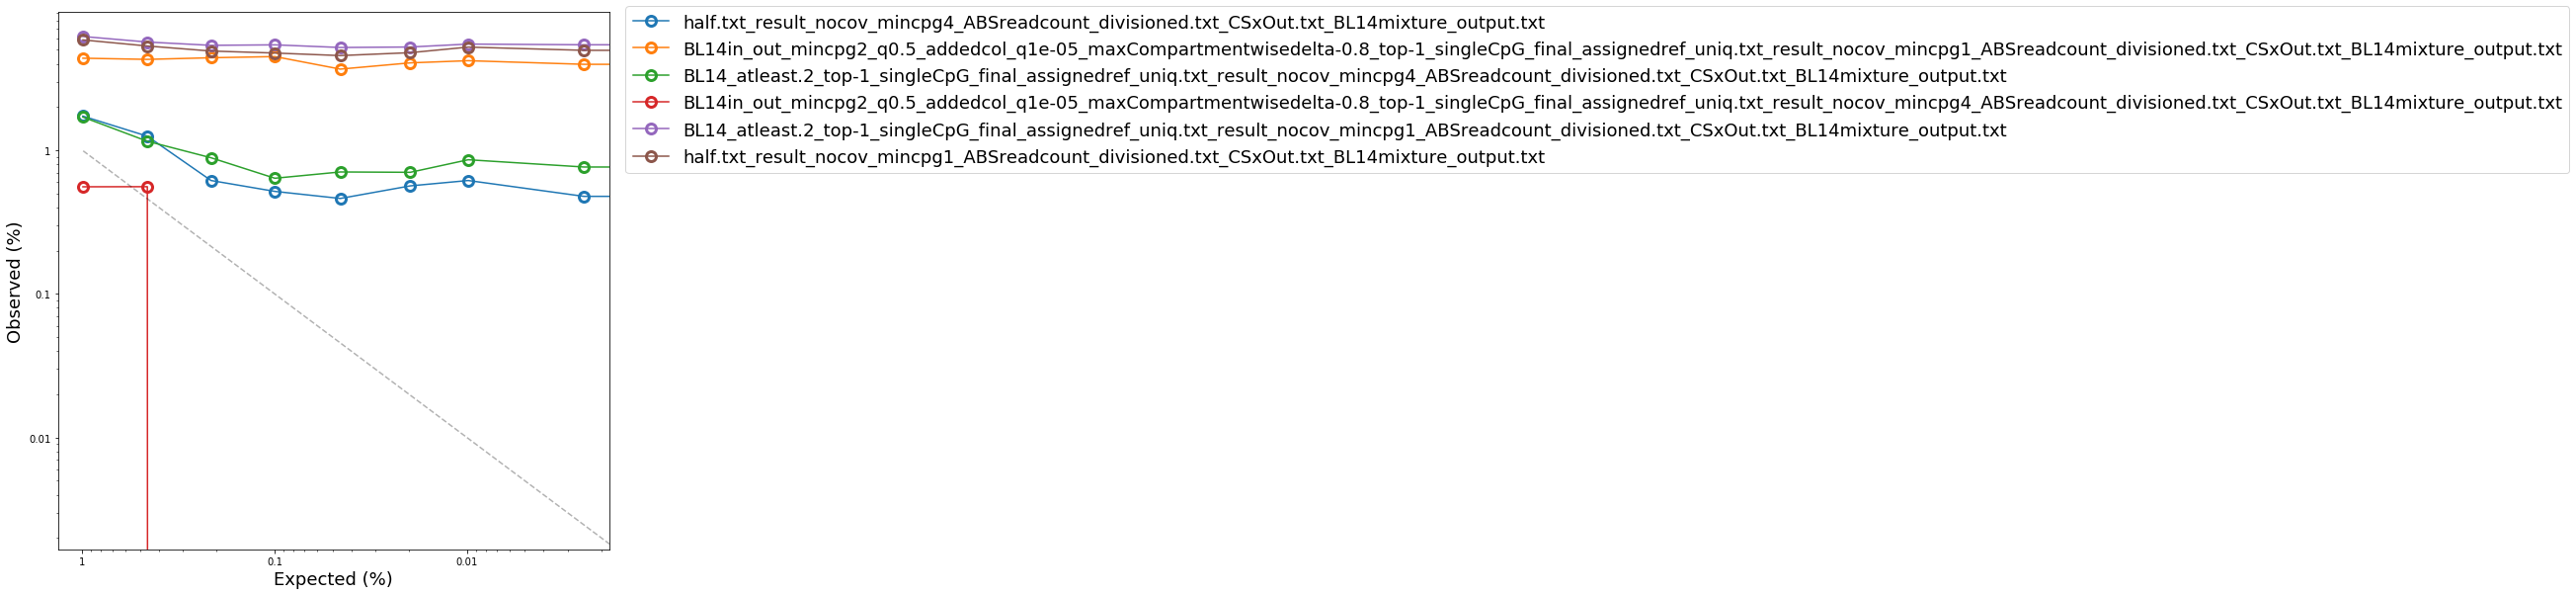

In [146]:
fig, ax = plt.subplots(figsize=(10, 10))

for file_name in infiles:
    file = infol + '/' + file_name
    data = pd.read_csv(file, sep='\t', index_col=0)
    df = pd.DataFrame(data)
    
    df['Index Number'] = [int(i.split('insilmix')[-1]) for i in df.index]

    df.sort_values(['Index Number'], inplace=True)
    df = df.drop('Index Number', axis=1)
    
    for col in df.columns:
        if 'real' not in col:
            df[col] = np.array(df[col]) * 100
            
    y, x = generate_lists(df, cell, cell_real)
    print(x, y)
    ax.plot(np.array(x), y, label=file_name, marker='o', mew=3, ms=10, fillstyle='none')

ax.plot(x, x, alpha=0.3, ls='--', c='k')
ax.invert_xaxis()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Expected (%)', fontsize=18)
ax.set_ylabel('Observed (%)', fontsize=18)
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:g}'.format(y)))
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:g}'.format(y)))
plt.legend(loc=(1.03, 0.7), fontsize=18)

In [131]:
fig.savefig('plot_g.pdf',dpi=300, bbox_inches='tight')